# Hands-On Pertemuan 12 and 13: Data Cleaning, Preparation, and Visualization

Objectives:

- Pertemuan 12: Master data cleaning and preparation techniques using Pandas.
- Pertemuan 13: Develop skills in data visualization using Matplotlib and Seaborn for effective data analysis.


## Pertemuan 12: Data Cleaning and Preparation using Pandas

Topics Covered

- Identifying and handling missing data.
- Data transformation and normalization.
- Data filtering and deduplication.
- Standardization of categorical data.
- Outlier detection and handling.

Practice Tasks
1. Load a dataset of your choice and identify missing values.
2. Implement data transformations to normalize numerical columns.
3. Standardize categorical columns and remove duplicates.

In [2]:
#Task 1

import pandas as pd

# Membaca file CSV
file_path = "D:\School\Semester 3\BigData\Prak12 dan 13\irs_990_2020_v3.csv"  # Ganti dengan nama file Anda
df = pd.read_csv(file_path)

# Melihat beberapa baris awal dataset
print(df.head())

# Informasi dataset
print(df.info())


C:\Users\User\AppData\Local\Temp\ipykernel_18844\1678308935.py:7: DtypeWarning: Columns (0,13,15,17,19,21,22,78,85,92,93,94,96,97,98,99,102,103,104,105,106,111,112) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  return_type          ein business_name_control  \
0       990EZ  261382062.0                  LEAR   
1       990EZ  232655257.0                  NATL   
2       990EZ  461619725.0                  MADI   
3       990EZ  264326267.0                  FAYE   
4       990EZ  464114716.0                  COLO   

                     business_name_ln1 business_name_ln2  zip_code  \
0                LEARNING INSIGHTS INC               NaN   63052.0   
1   NATL ASSOC OF WOMEN BUSINESS OWNER               NaN   19034.0   
2  MADISON ICE HOCKEY BOOSTER CLUB INC               NaN    7940.0   
3       FAYETTEVILLE POLICE FOUNDATION               NaN   28301.0   
4                 Colors of Connection               NaN   98155.0   

                         address             city state principal_officer  \
0                     PO BOX 353         Imperial    MO               NaN   
1           1231 HIGHLAND AVENUE  FORT WASHINGTON    PA               NaN   
2  C/O JEN GERO- 191 CENTRAL AVE   

In [7]:
print(df.isnull().sum())


return_type                    0
ein                            0
business_name_control          0
business_name_ln1              0
business_name_ln2              0
                              ..
public_support_pct_cy          0
public_support_pct_py          0
public_org_170                 0
public_support_total_amount    0
total_support_amount           0
Length: 133, dtype: int64


In [4]:
#Task 2

# Mengisi missing values numerik
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Mengisi missing values kategorikal
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_18844\2583699999.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_18844\2583699999.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [8]:
# Task3

# Mendeteksi duplikasi
duplicate_rows = df[df.duplicated()]
print("Jumlah duplikasi:", len(duplicate_rows))

# Menghapus data duplikat
df.drop_duplicates(inplace=True)

# Menghapus duplikasi dan memperbarui DataFrame
df = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikasi:", len(df))



Jumlah duplikasi: 0
Jumlah data setelah menghapus duplikasi: 473946


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])


In [10]:
# Pastikan semua nilai di kolom kategorikal menjadi string
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df[col] = df[col].astype(str)

# Terapkan LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])



In [11]:
# Ganti NaN dengan string khusus (misalnya "Unknown")
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")

# Terapkan LabelEncoder kembali
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])


In [12]:
# Periksa isi tiap kolom kategorikal
for col in cat_cols:
    print(f"Kolom: {col}, Unique Values: {df[col].unique()}")


Kolom: return_type, Unique Values: [1 0 2]
Kolom: business_name_control, Unique Values: [18336 21691 19513 ...  3557 14768 23280]
Kolom: business_name_ln1, Unique Values: [209475 255276 223665 ... 407844 187784  79656]
Kolom: business_name_ln2, Unique Values: [28425 17177 27671 ... 44430  6688 16720]
Kolom: address, Unique Values: [308900  38318 286940 ... 216246  44210 240261]
Kolom: city, Unique Values: [ 9887  6970 12166 ... 15817 14459 13685]
Kolom: state, Unique Values: [27 41 34 30 52  6 26  7 17  4 54  2 28 22 12 11 51  8 23 49 15  9 33 37
 47  5 38 20 21 53 25 55 46 40 45 44 14 18 10 19 39 32  1 43 16 29 36 35
 24 31 48 50 42 13  3  0]
Kolom: principal_officer, Unique Values: [ 90886 153267 129260 ...  40417 192562 143913]
Kolom: website, Unique Values: [ 20316 149680  14492 ...  94670  14789 120028]
Kolom: website_ez, Unique Values: [ 8103 28599 22098 ... 15481 33355 52708]
Kolom: org_type_other_description, Unique Values: [330 588 547 ...  12   8 957]
Kolom: legal_domicile_st

In [11]:
# Menyimpan ke file CSV baru
df.to_csv("cleaned_dataset_downloaded.csv", index=False)
print("Dataset telah disimpan sebagai 'cleaned_dataset_downloaded.csv'.")

Dataset telah disimpan sebagai 'cleaned_dataset_downloaded.csv'.


In [12]:
import os
print("Dataset disimpan di lokasi:", os.getcwd())


Dataset disimpan di lokasi: d:\VS Code\Ikhsan\Microsoft VS Code


## Pertemuan 13: Data Visualization using Matplotlib and Seaborn

### Topics Covered
- Plotting data distributions and comparisons.
- Creating time series visualizations.
- Visualizing relationships between variables.
- Customizing plot styles and layouts.

### Practice Tasks
- Use Matplotlib to create a multi-bar chart to compare data across groups.
- Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
- Customize plot layouts and color schemes.


   return_type       ein  business_name_control  business_name_ln1  \
0            1  0.254419                  18336             209475   
1            1  0.225344                  21691             255276   
2            1  0.457091                  19513             223665   
3            1  0.257399                  10842             121440   
4            1  0.459616                   7011              91805   

   business_name_ln2  zip_code  address   city  state  principal_officer  ...  \
0              28425  0.000062   308900   9887     27              90886  ...   
1              28425  0.000018    38318   6970     41              90886  ...   
2              28425  0.000007   286940  12166     34              90886  ...   
3              28425  0.000028   197683   6701     30              90886  ...   
4              28425  0.000098   325566  20397     52              90886  ...   

   program_services_total  total_assets_eoy  total_assets_boy  \
0                0.000206  

C:\Users\User\AppData\Local\Temp\ipykernel_18844\2185731646.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='org_type_corporation', palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_18844\2185731646.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\User\AppData\Local\Temp\ipykernel_18844\2185731646.py:56: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='total_num_employees', y='total_revenue_cy', palette='Blues_d')
C:\Users\User\AppData\Local\Temp\ipykernel_18844\2185731646.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored

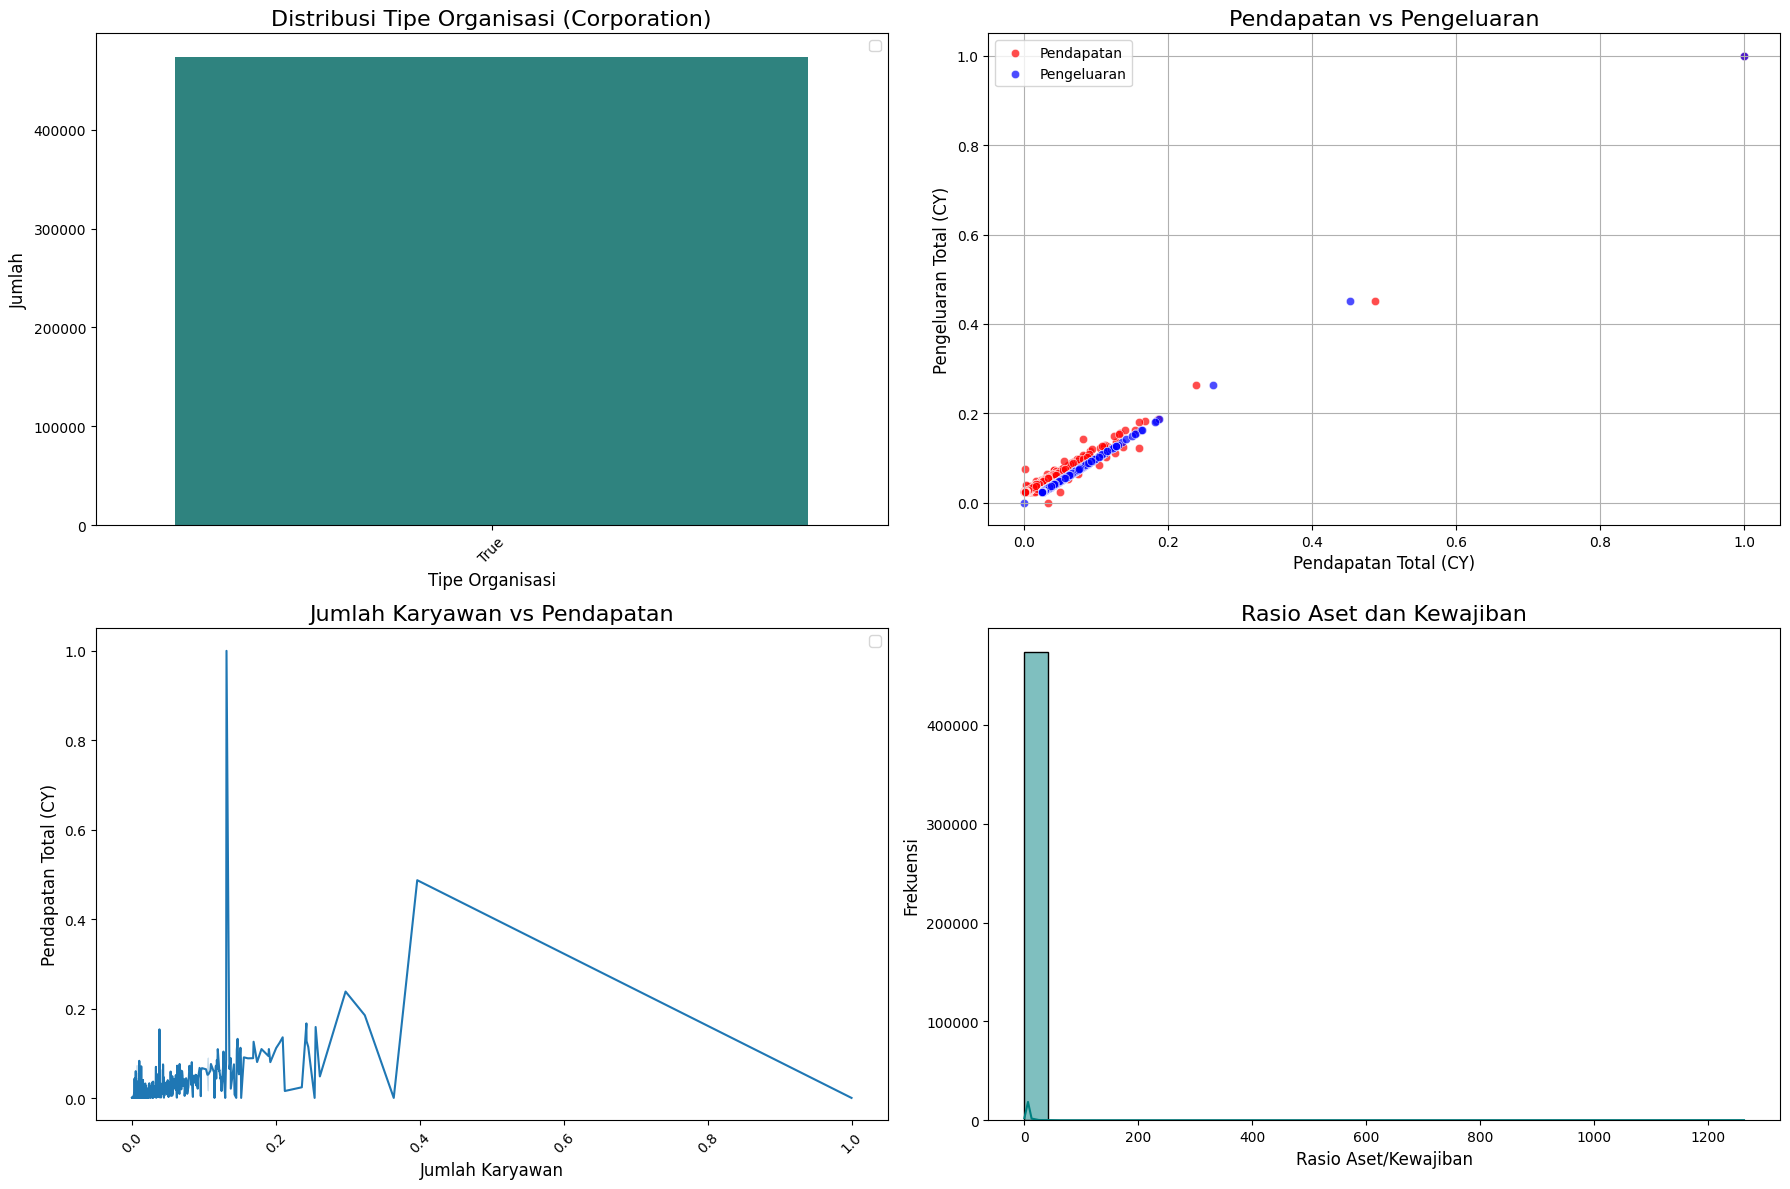

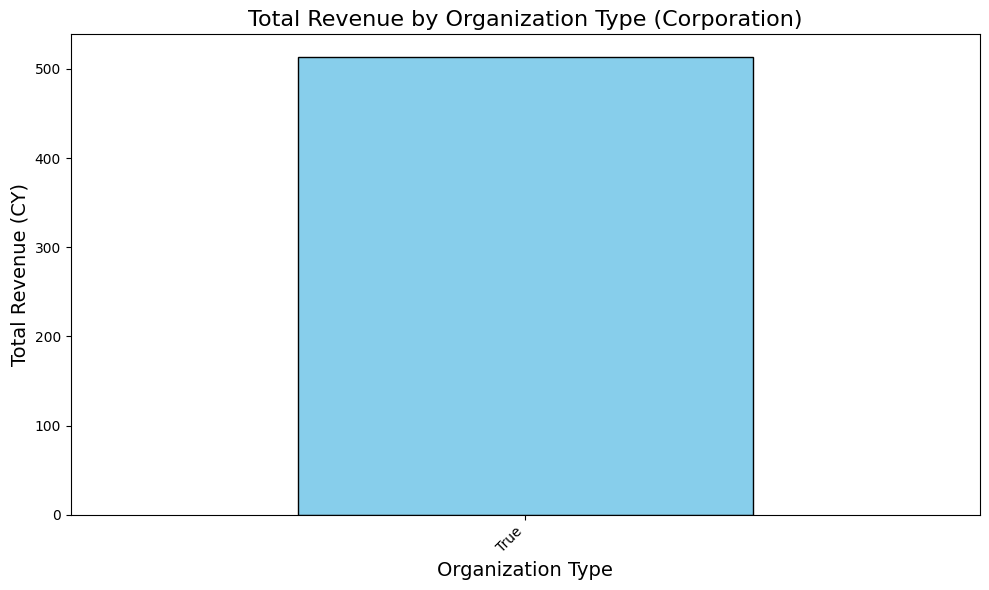

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Memuat dan Memeriksa Dataset
file_path = r"D:\School\Semester 3\BigData\Prak12 dan 13\cleaned_dataset_downloaded.csv"
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama untuk memeriksa data
print(df.head())

# 3. Pra-pemrosesan Data
# Menghapus nilai yang hilang (NaN)
df = df.dropna()
# Hanya untuk checking

# Mengonversi kolom yang sesuai ke tipe numerik
df['formation_year'] = pd.to_numeric(df['formation_year'], errors='coerce')
df['total_revenue_cy'] = pd.to_numeric(df['total_revenue_cy'], errors='coerce')
df['total_expenses_cy'] = pd.to_numeric(df['total_expenses_cy'], errors='coerce')
df['total_assets_eoy'] = pd.to_numeric(df['total_assets_eoy'], errors='coerce')
df['total_liabilities_eoy'] = pd.to_numeric(df['total_liabilities_eoy'], errors='coerce')

# 4. Visualisasi Data

# Menyusun figure besar untuk beberapa visualisasi
plt.figure(figsize=(18, 12))  # Menambah ukuran figure untuk memudahkan tampilan

# **Visualisasi 1: Distribusi Tipe Organisasi**
plt.subplot(2, 2, 1)  # Menempatkan visualisasi pertama pada posisi 2x2 grid
sns.countplot(data=df, x='org_type_corporation', palette='viridis')
plt.title("Distribusi Tipe Organisasi (Corporation)", fontsize=16)
plt.xlabel("Tipe Organisasi", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=45)
plt.legend()

# **Visualisasi 2: Pendapatan vs Pengeluaran**
plt.subplot(2, 2, 2)  # Menempatkan visualisasi kedua pada posisi 2x2 grid
# Scatter plot untuk Pendapatan (merah)
sns.scatterplot(data=df, x='total_revenue_cy', y='total_expenses_cy', color='red', label='Pendapatan', alpha=0.7)

# Scatter plot untuk Pengeluaran (biru)
sns.scatterplot(data=df, x='total_expenses_cy', y='total_expenses_cy', color='blue', label='Pengeluaran', alpha=0.7)
plt.title("Pendapatan vs Pengeluaran", fontsize=16)
plt.xlabel("Pendapatan Total (CY)", fontsize=12)
plt.ylabel("Pengeluaran Total (CY)", fontsize=12)
plt.grid(True)
plt.legend()

# **Visualisasi 3: Jumlah Karyawan vs Pendapatan**
plt.subplot(2, 2, 3)  # Menempatkan visualisasi ketiga pada posisi 2x2 grid
sns.lineplot(data=df, x='total_num_employees', y='total_revenue_cy', palette='Blues_d')
plt.title("Jumlah Karyawan vs Pendapatan", fontsize=16)
plt.xlabel("Jumlah Karyawan", fontsize=12)
plt.ylabel("Pendapatan Total (CY)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()

# **Visualisasi 4: Rasio Aset dan Kewajiban**
plt.subplot(2, 2, 4)  # Menempatkan visualisasi keempat pada posisi 2x2 grid
df['asset_liability_ratio'] = df['total_assets_eoy'] / df['total_liabilities_eoy']
sns.histplot(data=df, x='asset_liability_ratio', bins=30, kde=True, color='teal')
plt.title("Rasio Aset dan Kewajiban", fontsize=16)
plt.xlabel("Rasio Aset/Kewajiban", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)

# Menyesuaikan tampilan keseluruhan agar tidak tumpang tindih
plt.tight_layout()
plt.show()

# 5. Visualisasi Lain: Pendapatan Berdasarkan Tipe Organisasi
# Grouping by organization type to sum total revenue
revenue_by_corporation = df.groupby('org_type_corporation')['total_revenue_cy'].sum()

# Membuat bar chart untuk visualisasi ini
plt.figure(figsize=(10, 6))
revenue_by_corporation.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Revenue by Organization Type (Corporation)', fontsize=16)
plt.xlabel('Organization Type', fontsize=14)
plt.ylabel('Total Revenue (CY)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Analayze Future Trend

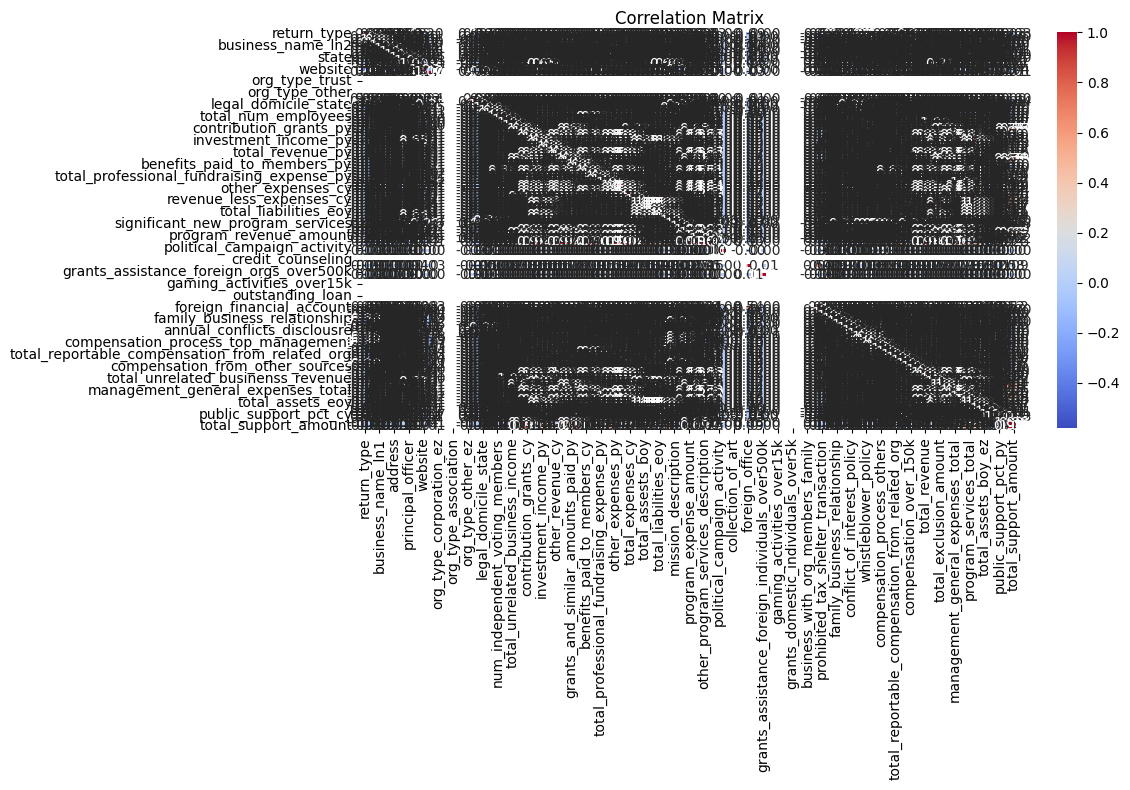

In [30]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


Mean Squared Error: 1.1355400542765107e-06
R-squared: 0.41524128375287994


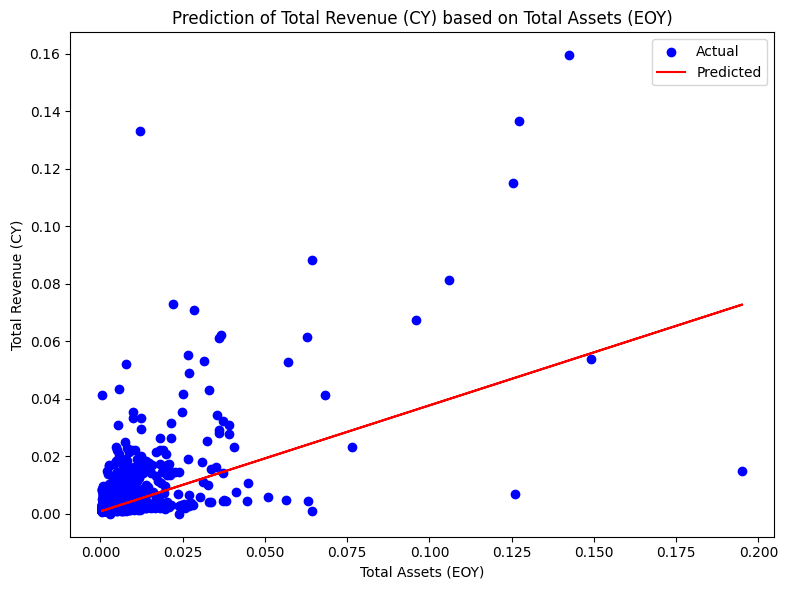

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
X = df[['total_assets_eoy']]  # Using 'total_assets_eoy' as a predictor
y = df['total_revenue_cy']  # Target is 'total_revenue_cy'

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Prediction of Total Revenue (CY) based on Total Assets (EOY)')
plt.xlabel('Total Assets (EOY)')
plt.ylabel('Total Revenue (CY)')
plt.legend()
plt.tight_layout()
plt.show()


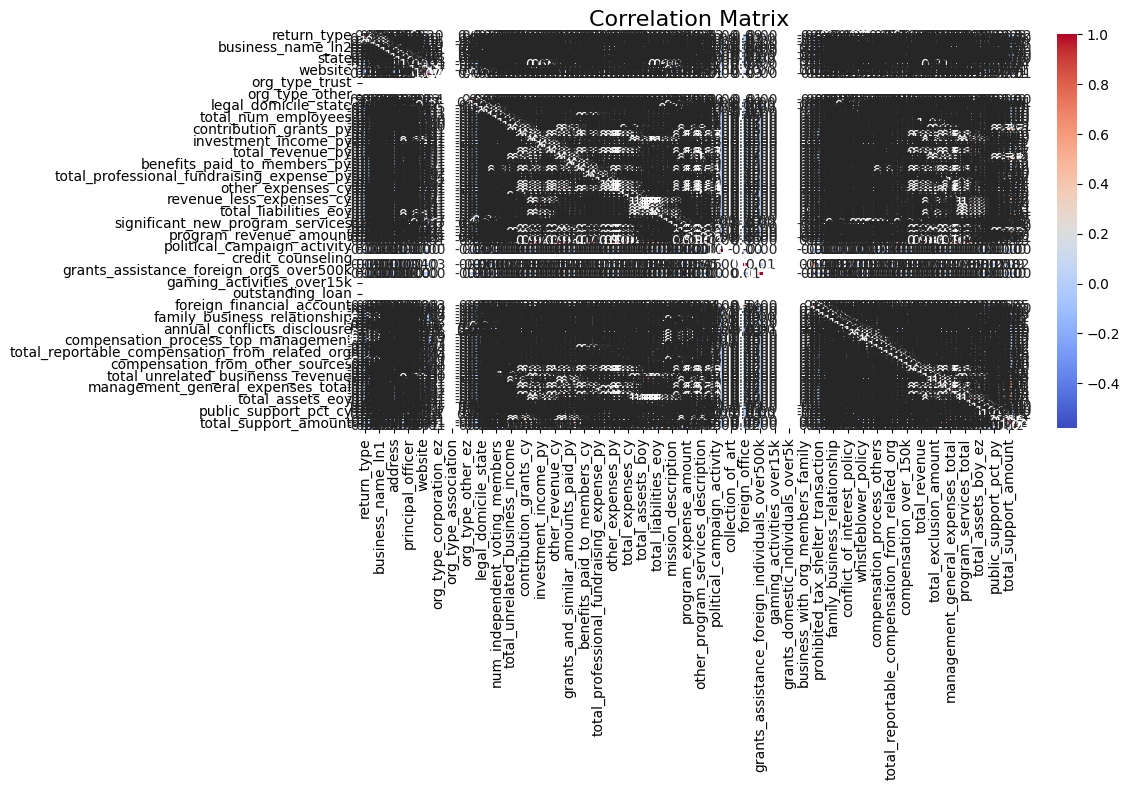

Mean Squared Error: 1.1355400542765107e-06
R-squared: 0.41524128375287994


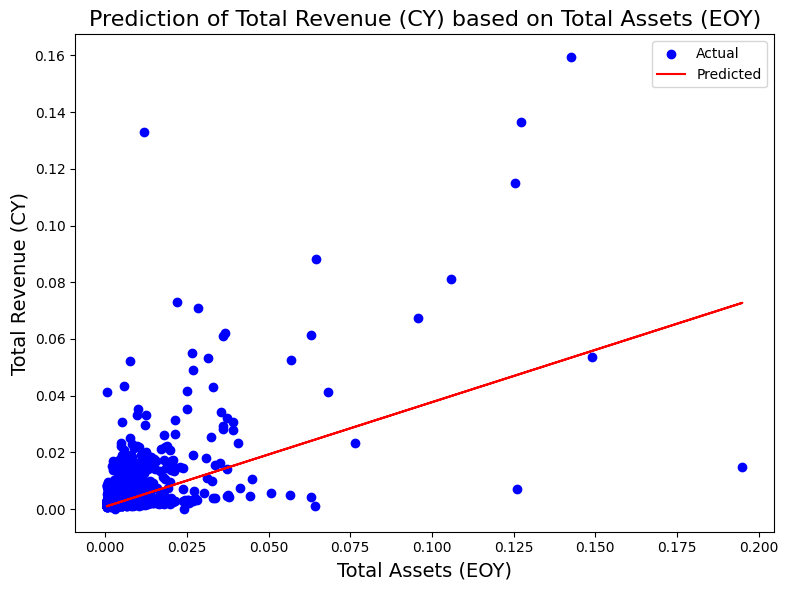

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 6. Korelasi Antar Variabel
# Menghitung korelasi antara kolom numerik
corr_matrix = df.corr()

# Menampilkan heatmap untuk matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

# 7. Model Prediktif: Prediksi Pendapatan Berdasarkan Aset
# Memilih fitur dan target variabel
X = df[['total_assets_eoy']]  # Menggunakan total_assets_eoy sebagai prediktor
y = df['total_revenue_cy']  # Target adalah total_revenue_cy

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualisasi hasil prediksi
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Prediction of Total Revenue (CY) based on Total Assets (EOY)', fontsize=16)
plt.xlabel('Total Assets (EOY)', fontsize=14)
plt.ylabel('Total Revenue (CY)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()
